PARA CONSEGUIR IMAGEN EN ESPECIFICO TEST, LO QUE SE UTILIZA

In [2]:
import pickle
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
#import keras.api._v2.keras as keras
#from tensorflow.keras import datasets, layers, models, regularizers

In [3]:
cifar10 = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [4]:
avion_class = 0  #AVION
rana_class = 6  # RANA

# Filtrar las imágenes y etiquetas para quedarnos solo con los gatos y perros
avion_indices = (Y_train == avion_class).squeeze()
rana_indices = (Y_train == rana_class).squeeze()
avion_rana_indices = avion_indices | rana_indices

X_train_avion_rana = X_train[avion_rana_indices]
Y_train_avion_rana = Y_train[avion_rana_indices]

# Verificar las dimensiones del nuevo conjunto de datos
print("Dimensiones de X_train_cat_dog:", X_train_avion_rana.shape)
print("Dimensiones de Y_train_cat_dog:", Y_train_avion_rana.shape)

Dimensiones de X_train_cat_dog: (10000, 32, 32, 3)
Dimensiones de Y_train_cat_dog: (10000, 1)


In [5]:
# Definir las clases que nos interesan (aviom y rana) PARA HACERLO SOLO CON SIGMOID
avion_class = 0  #AVION
rana_class = 6  # RANA

# Filtrar las imágenes y etiquetas para quedarnos solo con los gatos y perros
avion_indices = (Y_test == avion_class).squeeze()
rana_indices = (Y_test == rana_class).squeeze()
avion_rana_indices = avion_indices | rana_indices

X_test_avion_rana = X_test[avion_rana_indices]
Y_test_avion_rana = Y_test[avion_rana_indices]

# Verificar las dimensiones del nuevo conjunto de datos
print("Dimensiones de X_train_cat_dog:", X_test_avion_rana.shape)
print("Dimensiones de Y_train_cat_dog:", Y_test_avion_rana.shape)

Dimensiones de X_train_cat_dog: (2000, 32, 32, 3)
Dimensiones de Y_train_cat_dog: (2000, 1)


In [6]:
Y_train_avion_rana= np.where(Y_train_avion_rana == rana_class, 0, 1) # 1 avion 0 rana
Y_test_avion_rana = np.where(Y_test_avion_rana == rana_class, 0, 1)

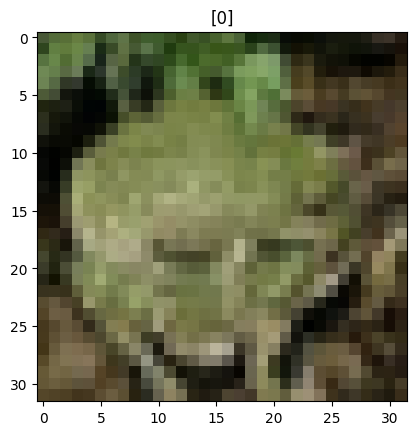

In [7]:
#FOTO RANA INDEX 124
index = 426 #280 rana,115 avion
image_selected=X_test_avion_rana[index]
image_selected_array =np.array(image_selected)
image_selected= image_selected_array.reshape(32, 32, 3)
plt.title(Y_test_avion_rana[index])
plt.imshow(image_selected) #display sample training image
plt.show()

In [8]:
image_selected
print(image_selected)

[[[ 72  88  54]
  [ 83 107  57]
  [ 88 111  55]
  ...
  [ 55  48  38]
  [ 60  51  41]
  [ 36  27  18]]

 [[ 47  69  30]
  [ 97 127  66]
  [ 97 123  60]
  ...
  [ 24  24  18]
  [ 22  19  12]
  [ 25  16   8]]

 [[ 87 115  64]
  [104 135  74]
  [ 82 108  51]
  ...
  [  2   3   0]
  [  7   5   0]
  [ 35  26  12]]

 ...

 [[102  89  54]
  [119 106  72]
  [114 101  67]
  ...
  [ 43  35  20]
  [ 44  35  20]
  [ 37  28  18]]

 [[100  87  54]
  [107  94  62]
  [101  88  56]
  ...
  [ 61  55  34]
  [ 42  35  17]
  [ 70  60  39]]

 [[ 84  70  41]
  [ 80  66  38]
  [ 77  63  35]
  ...
  [ 41  35  22]
  [ 31  26  14]
  [ 57  45  26]]]


In [9]:
import numpy as np
import json
import pandas as pd

def format_img_fpga(img):
    """
    Transforms a CIFAR-10 dataset image (32, 32, 3) into a
    flattened and quantized version ready to be sent over to
    the FPGA CNN implementation
    """
    if img.shape != (32, 32,3):
        raise Exception('Wrong image shape')

    # Get channels (32, 32)
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]

    # Flatten
    rf = r.reshape(-1,1024)
    gf = g.reshape(-1, 1024)
    bf = b.reshape(-1, 1024)

    # Quantize - <1,1,6> fixed-point value
    #rq = rf >> 2
    #gq = gf >> 2
    #bq = bf >> 2

    fpga_img = np.concatenate((rf, gf, bf), axis=1)
    #fpga_img = rq
   #fpga_img = np.append(fpga_img, 0)
    fpga_img=np.concatenate((fpga_img, np.zeros((1, 1), dtype=fpga_img.dtype)), axis=1)
    # Añadir un cero al final

    return fpga_img

In [11]:
img = format_img_fpga(X_test_avion_rana[index])
print(img)
with open('frog_image_index_426.bin', 'wb') as f:
    f.write(img)

[[72 83 88 ... 14 26  0]]
